In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\code\Bank customer churn\Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2489,2490,15776824,Rossi,714,France,Male,28,6,122724.37,1,1,1,67057.27,0
2796,2797,15770719,Duncan,697,France,Female,39,6,151553.19,1,1,1,44946.29,0
8899,8900,15677939,Ch'eng,584,France,Female,41,3,0.00,2,1,1,160095.48,0
4552,4553,15655648,Bock,610,France,Female,25,2,0.00,2,1,0,123723.83,0
9164,9165,15767488,Berry,680,Spain,Male,36,7,0.00,2,1,0,20109.21,0


In [3]:
df.drop(["CustomerId","Surname","RowNumber"],axis='columns', inplace=True)

In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
def print_unique_value(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column}: {df[column].unique()}')

In [6]:
print_unique_value(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [7]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [8]:
df['Gender'].replace({'Female': 1, "Male": 0}, inplace = True)

In [9]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [10]:
df1 = pd.get_dummies(data=df, columns =['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [11]:
df1.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
7533,630,1,51,0,108449.23,3,0,0,88372.69,1,0,1,0
5316,654,0,40,5,105683.63,1,1,0,173617.09,0,0,0,1
4012,554,0,46,4,0.00,2,0,1,57320.92,0,0,0,1
4745,768,0,49,1,133384.66,1,1,0,102397.22,1,0,1,0


In [12]:
age_data = [];
for age_value in df1['Age']:
    age_data.append(age_value)

print(age_data)
    

[42, 41, 42, 39, 43, 44, 50, 29, 44, 27, 31, 24, 34, 25, 35, 45, 58, 24, 45, 24, 41, 32, 38, 46, 38, 25, 36, 44, 43, 29, 39, 36, 41, 42, 29, 45, 31, 33, 36, 41, 40, 51, 61, 49, 61, 32, 27, 39, 38, 37, 44, 36, 33, 41, 42, 43, 45, 19, 66, 51, 35, 27, 33, 56, 26, 36, 34, 43, 35, 21, 58, 29, 37, 25, 36, 21, 55, 32, 33, 41, 34, 32, 36, 34, 46, 75, 22, 30, 46, 28, 44, 45, 36, 29, 42, 35, 41, 29, 22, 34, 40, 44, 31, 36, 65, 46, 32, 36, 33, 35, 30, 39, 42, 36, 28, 30, 37, 41, 31, 34, 34, 39, 39, 48, 28, 42, 52, 56, 41, 24, 34, 33, 38, 25, 39, 50, 34, 40, 48, 35, 44, 34, 43, 52, 31, 21, 29, 37, 44, 32, 32, 48, 42, 37, 43, 57, 33, 28, 73, 33, 22, 30, 49, 36, 29, 31, 24, 41, 39, 24, 29, 27, 44, 30, 40, 35, 30, 36, 40, 55, 45, 65, 45, 42, 50, 32, 39, 37, 30, 34, 41, 36, 40, 32, 29, 35, 32, 37, 57, 35, 30, 42, 50, 38, 33, 37, 41, 34, 45, 45, 33, 31, 41, 34, 26, 47, 46, 33, 43, 54, 31, 30, 42, 33, 45, 37, 30, 39, 50, 29, 72, 40, 37, 20, 67, 42, 29, 43, 46, 28, 38, 39, 37, 67, 34, 40, 26, 26, 24, 54,

In [13]:
age_data
bins = [0,18, 100]
labels = ['children', 'Adult']
df1['AgeGroup'] = pd.cut(age_data, bins=bins, labels=labels, right=False)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,AgeGroup
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,Adult
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,Adult
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,Adult
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,Adult
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0,Adult
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0,Adult
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0,Adult
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0,Adult


In [14]:
df1.drop(["Age"],axis='columns', inplace=True)

In [15]:
df1.dtypes

CreditScore             int64
Gender                  int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
AgeGroup             category
dtype: object

In [16]:
df1['AgeGroup'].replace({'children':0, 'Adult':1}, inplace=True)


In [17]:
df1

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,AgeGroup
0,619,1,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,608,1,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,1,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,1,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,850,1,2,125510.82,1,1,1,79084.10,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,5,0.00,2,1,0,96270.64,0,1,0,0,1
9996,516,0,10,57369.61,1,1,1,101699.77,0,1,0,0,1
9997,709,1,7,0.00,1,0,1,42085.58,1,1,0,0,1
9998,772,0,3,75075.31,2,1,0,92888.52,1,0,1,0,1


In [23]:
pd.to_numeric(df1.AgeGroup)


CategoricalDtype(categories=[0, 1], ordered=True)

In [19]:
cols_to_scale = [ 'CreditScore', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [20]:
df1

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,AgeGroup
0,0.538,1,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1
1,0.516,1,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1
2,0.304,1,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1
3,0.698,1,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1
4,1.000,1,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0,1
9996,0.332,0,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0,1
9997,0.718,1,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0,1
9998,0.844,0,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0,1


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [22]:
df1.dtypes

CreditScore           float64
Gender                  int64
Tenure                float64
Balance               float64
NumOfProducts         float64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Geography_France        uint8
Geography_Germany       uint8
Geography_Spain         uint8
AgeGroup             category
dtype: object

In [24]:
X = df1.drop('Exited',  axis='columns')
y = df1['Exited']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [27]:
X_train.shape

(8000, 12)

In [28]:
y_train.shape

(8000,)

In [29]:
X_test.shape

(2000, 12)

In [30]:
len(X_train.columns)

12

In [32]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(12, ), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    
])

model.compile(optimizer='adam',
             loss="binary_crossentropy",
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 0.5452 - accuracy: 0.7629
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4842 - accuracy: 0.7959
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4732 - accuracy: 0.7958
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4704 - accuracy: 0.7956
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4668 - accuracy: 0.7991
Epoch 6/500
250/250 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.7969
Epoch 7/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.7986
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4533 - accuracy: 0.7996
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4470 - accuracy: 0.8000
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4407 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8263
Epoch 80/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8280
Epoch 81/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8253
Epoch 82/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8249
Epoch 83/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8260
Epoch 84/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3865 - accuracy: 0.8244
Epoch 85/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3854 - accuracy: 0.8261
Epoch 86/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8250
Epoch 87/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3855 - accuracy: 0.8267
Epoch 88/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 

250/250 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8281
Epoch 156/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8289
Epoch 157/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8281
Epoch 158/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8276
Epoch 159/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8285
Epoch 160/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8261
Epoch 161/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8282
Epoch 162/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8289
Epoch 163/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8295: 0s - loss: 0.3661 
Epoch 164/500
250/250 [==============================] - 1s 2ms/ste

250/250 [==============================] - 1s 3ms/step - loss: 0.3816 - accuracy: 0.8303
Epoch 234/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.8301
Epoch 235/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3815 - accuracy: 0.8291
Epoch 236/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8281
Epoch 237/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3817 - accuracy: 0.8296
Epoch 238/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3820 - accuracy: 0.8294
Epoch 239/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3812 - accuracy: 0.8282
Epoch 240/500
250/250 [==============================] - ETA: 0s - loss: 0.3820 - accuracy: 0.82 - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8280
Epoch 241/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8315
Epoch 242/500
250/250 [======================

250/250 [==============================] - 1s 2ms/step - loss: 0.3801 - accuracy: 0.8299
Epoch 312/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8263
Epoch 313/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3800 - accuracy: 0.8314
Epoch 314/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8306
Epoch 315/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8298
Epoch 316/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8286
Epoch 317/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.8299
Epoch 318/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8316
Epoch 319/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8281
Epoch 320/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3798 - a

250/250 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8330
Epoch 390/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8294
Epoch 391/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8307
Epoch 392/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8322
Epoch 393/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8314
Epoch 394/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3782 - accuracy: 0.8313
Epoch 395/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3792 - accuracy: 0.8311
Epoch 396/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3779 - accuracy: 0.8320
Epoch 397/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8309
Epoch 398/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3793 - a

250/250 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8338
Epoch 469/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8313
Epoch 470/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8304
Epoch 471/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8332
Epoch 472/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3780 - accuracy: 0.8309
Epoch 473/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8339
Epoch 474/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3776 - accuracy: 0.8298
Epoch 475/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8315
Epoch 476/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8314
Epoch 477/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3773 - a

In [33]:
yp = model.predict(X_test)
yp[:5]

array([[0.04816049],
       [0.14291486],
       [0.06938857],
       [0.18524113],
       [0.05726853]], dtype=float32)

In [34]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1595
           1       0.60      0.33      0.43       405

    accuracy                           0.82      2000
   macro avg       0.72      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



Text(69.0, 0.5, 'Truth')

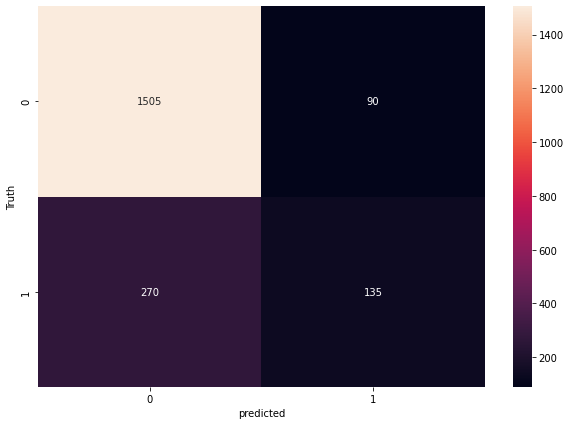

In [37]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')